in this notebook we:
* investigate the model (s predictions) for stage2a-5epochs-384_512-rescaled

In [1]:
from pathlib import Path
import json
import logging

import numpy as np
import pandas as pd

from fastai.vision import *

import os

# import wandb
# from wandb.fastai import WandbCallback

from IPython.display import Image, display

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# import configparser

# from functions_wandb_no_rescale import *

import random

In [2]:
HOME_FOLDER_OF_REPO = Path("/home/jupyter/repo_gabon_wildlife_training/")
INSPECTED_MODEL_WEIGHTS = HOME_FOLDER_OF_REPO / "best_models/stage2a-5epochs-384_512-rescaled.pth"

#### Load predictions from the model on validation set

In [3]:
preds = torch.load(HOME_FOLDER_OF_REPO / "training/preds-stage2a-5epochs-384_512-rescaled.pt")

In [4]:
print(f"preds[0].shape = {preds[0].shape}")
print(f"preds[1].shape = {preds[1].shape}")
print(f"preds[2].shape = {preds[2].shape}")

preds[0].shape = torch.Size([43628, 28])
preds[1].shape = torch.Size([43628])
preds[2].shape = torch.Size([43628])


In [5]:
preds[0][0]

tensor([4.6560e-08, 8.7178e-08, 1.7141e-07, 2.9414e-10, 6.6426e-09, 4.3283e-10,
        4.1353e-09, 5.5567e-08, 1.9248e-08, 4.7183e-11, 9.5826e-08, 1.3708e-10,
        1.2489e-09, 1.0002e-08, 2.6560e-08, 2.8682e-03, 9.9713e-01, 8.5031e-09,
        2.2339e-10, 1.6194e-10, 5.6872e-09, 8.8099e-08, 1.3844e-08, 3.3290e-10,
        3.0099e-10, 8.8375e-09, 1.1516e-08, 7.8649e-10])

In [6]:
preds

[tensor([[4.6560e-08, 8.7178e-08, 1.7141e-07,  ..., 8.8375e-09, 1.1516e-08,
          7.8649e-10],
         [5.6613e-06, 8.5108e-04, 7.0022e-06,  ..., 4.5152e-03, 2.2992e-05,
          7.8514e-06],
         [5.0955e-08, 9.9908e-01, 1.1298e-06,  ..., 9.6359e-08, 3.9606e-07,
          1.6927e-07],
         ...,
         [5.5203e-08, 1.0877e-07, 6.9357e-08,  ..., 1.0326e-07, 9.6139e-09,
          3.6428e-08],
         [9.8681e-02, 1.3292e-03, 4.3274e-05,  ..., 1.7022e-04, 7.8663e-05,
          3.4801e-02],
         [1.9499e-05, 9.2775e-05, 3.0667e-06,  ..., 3.2713e-06, 4.4004e-05,
          2.1881e-03]]),
 tensor([16, 23,  1,  ...,  9, 27, 18]),
 tensor([2.8730e-03, 1.7178e-02, 9.1701e-04,  ..., 5.5192e-05, 3.3581e+00,
         2.9341e+00])]

#### load Classes

In [7]:
classes = sorted(['Human', 'Blank', 'Elephant_African', 'Hog_Red_River', 'Buffalo_African', 'Leopard_African', 'Monkey',
       'Duiker_Red', 'Civet_African_Palm', 'Squirrel', 'Duiker_Blue', 'Bird', 'Mongoose_Black_Footed', 'Rodent',
       'Duiker_Yellow_Backed', 'Genet', 'Chimpanzee', 'Gorilla', 'Mongoose', 'Porcupine_Brush_Tailed', 'Pangolin',
       'Mandrillus', 'Chevrotain_Water', 'Cat_Golden', 'Rat_Giant', 'Guineafowl_Crested', 'Guineafowl_Black',
       'Rail_Nkulengu'])
classes

['Bird',
 'Blank',
 'Buffalo_African',
 'Cat_Golden',
 'Chevrotain_Water',
 'Chimpanzee',
 'Civet_African_Palm',
 'Duiker_Blue',
 'Duiker_Red',
 'Duiker_Yellow_Backed',
 'Elephant_African',
 'Genet',
 'Gorilla',
 'Guineafowl_Black',
 'Guineafowl_Crested',
 'Hog_Red_River',
 'Human',
 'Leopard_African',
 'Mandrillus',
 'Mongoose',
 'Mongoose_Black_Footed',
 'Monkey',
 'Pangolin',
 'Porcupine_Brush_Tailed',
 'Rail_Nkulengu',
 'Rat_Giant',
 'Rodent',
 'Squirrel']

#### load images list

In [8]:
images_list = np.load(HOME_FOLDER_OF_REPO / "training/images_list-stage2a-5epochs-384_512-rescaled.pt.npy")

In [9]:
images_list

array(['/data_rescaled/resc_1039759.jpg', '/data_rescaled/resc_1195784.jpg', '/data_rescaled/resc_0880576.jpg',
       '/data_rescaled/resc_1194852.jpg', ..., '/data_rescaled/resc_1186961.jpg', '/data_rescaled/resc_1203146.jpg',
       '/data_rescaled/resc_1227618.jpg', '/data_rescaled/resc_1229185.jpg'], dtype='<U32')

In [10]:
preds[0][0].argmax()

tensor(16)

img: /data_rescaled/resc_1602824.jpg
label: Gorilla
pred: Chimpanzee


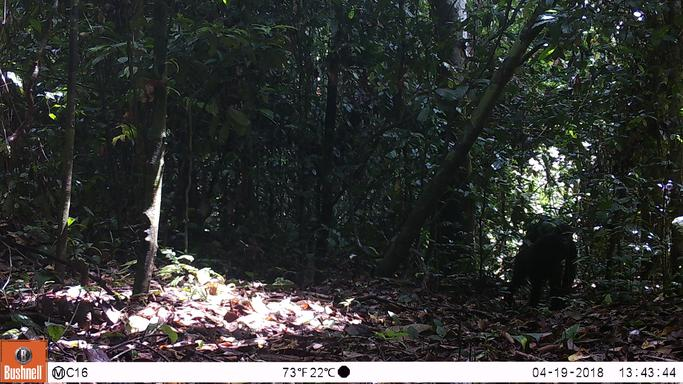

In [13]:
i = 1004
print(f"img: {images_list[i]}\nlabel: {classes[preds[1][i]]}\npred: {classes[preds[0][i].argmax()]}")
Image(images_list[i])

In [14]:
# cp /data_rescaled/resc_1530368.jpg ./

# Build df with predictions

In [15]:
df_preds = pd.DataFrame(preds[0].numpy(), columns=classes)

In [16]:
# df_preds["pred"] = df_preds.idxmax(axis=1)

In [17]:
df_preds["label"] = pd.Series(preds[1]).apply(lambda x: classes[x])

In [18]:
df_preds["img"] = images_list

In [19]:
df_preds["uniqueName"] = df_preds.img.str.extract("\/(\d*\.jpg)$", expand=True)

In [20]:
df_preds.head()

,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,Monkey,Pangolin,Porcupine_Brush_Tailed,Rail_Nkulengu,Rat_Giant,Rodent,Squirrel,label,img,uniqueName
0,4.655969e-08,8.717845e-08,1.714084e-07,2.941357e-10,6.642564e-09,4.328345e-10,4.135269e-09,5.556704e-08,1.924823e-08,4.718254e-11,...,8.809881e-08,1.384411e-08,3.329004e-10,3.009880e-10,8.837494e-09,1.151556e-08,7.864935e-10,Human,/data_rescaled/resc_1039759.jpg,1039759.jpg
1,5.661279e-06,8.510786e-04,7.002197e-06,1.580305e-07,2.478688e-03,1.838122e-06,8.551294e-06,7.195574e-05,2.097772e-06,1.497921e-06,...,5.591558e-06,9.453277e-06,9.829690e-01,2.106274e-06,4.515152e-03,2.299214e-05,7.851412e-06,Porcupine_Brush_Tailed,/data_rescaled/resc_1195784.jpg,1195784.jpg
2,5.095516e-08,9.990834e-01,1.129752e-06,1.137677e-08,1.609592e-08,2.568008e-08,4.873502e-08,1.953605e-07,1.630463e-07,7.535878e-10,...,7.349325e-07,1.120233e-08,5.187915e-08,1.724023e-08,9.635860e-08,3.960613e-07,1.692686e-07,Blank,/data_rescaled/resc_0880576.jpg,0880576.jpg
3,1.370626e-03,7.104965e-01,6.293981e-03,5.814397e-05,8.215211e-04,2.061178e-04,1.176124e-04,1.942325e-03,3.472823e-04,1.045766e-05,...,4.359819e-03,6.101453e-04,2.748366e-05,8.400722e-04,5.383019e-06,4.612424e-04,1.196688e-03,Monkey,/data_rescaled/resc_1194852.jpg,1194852.jpg
4,5.872330e-02,3.254626e-04,6.685724e-04,3.376703e-04,1.701453e-03,2.628898e-04,3.934061e-04,2.760512e-01,4.157926e-01,5.745498e-05,...,1.499925e-02,2.872374e-03,1.941458e-04,1.347434e-04,1.612127e-04,3.217414e-04,1.433609e-03,Hog_Red_River,/data_rescaled/resc_1201480.jpg,1201480.jpg


### top3

In [21]:
df_preds_only = pd.DataFrame(preds[0].numpy(), columns=classes)
ranks = df_preds_only.rank(axis=1,method='dense', ascending=False).astype(int)

df_preds["pred_1"] = pd.Series(ranks.where(ranks==1).notnull().values.nonzero()[1]).apply(lambda x: classes[x])
df_preds["pred_2"] = pd.Series(ranks.where(ranks==2).notnull().values.nonzero()[1]).apply(lambda x: classes[x])
df_preds["pred_3"] = pd.Series(ranks.where(ranks==3).notnull().values.nonzero()[1]).apply(lambda x: classes[x])

df_preds["score_1"] = df_preds.apply(lambda x: x[x.pred_1], axis=1)
df_preds["score_2"] = df_preds.apply(lambda x: x[x.pred_2], axis=1)
df_preds["score_3"] = df_preds.apply(lambda x: x[x.pred_3], axis=1)

In [22]:
df_preds.head()

,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,Squirrel,label,img,uniqueName,pred_1,pred_2,pred_3,score_1,score_2,score_3
0,4.655969e-08,8.717845e-08,1.714084e-07,2.941357e-10,6.642564e-09,4.328345e-10,4.135269e-09,5.556704e-08,1.924823e-08,4.718254e-11,...,7.864935e-10,Human,/data_rescaled/resc_1039759.jpg,1039759.jpg,Human,Hog_Red_River,Buffalo_African,0.997131,0.002868,1.714084e-07
1,5.661279e-06,8.510786e-04,7.002197e-06,1.580305e-07,2.478688e-03,1.838122e-06,8.551294e-06,7.195574e-05,2.097772e-06,1.497921e-06,...,7.851412e-06,Porcupine_Brush_Tailed,/data_rescaled/resc_1195784.jpg,1195784.jpg,Porcupine_Brush_Tailed,Hog_Red_River,Rat_Giant,0.982969,0.008077,4.515152e-03
2,5.095516e-08,9.990834e-01,1.129752e-06,1.137677e-08,1.609592e-08,2.568008e-08,4.873502e-08,1.953605e-07,1.630463e-07,7.535878e-10,...,1.692686e-07,Blank,/data_rescaled/resc_0880576.jpg,0880576.jpg,Blank,Human,Elephant_African,0.999083,0.000526,3.863540e-04
3,1.370626e-03,7.104965e-01,6.293981e-03,5.814397e-05,8.215211e-04,2.061178e-04,1.176124e-04,1.942325e-03,3.472823e-04,1.045766e-05,...,1.196688e-03,Monkey,/data_rescaled/resc_1194852.jpg,1194852.jpg,Blank,Elephant_African,Buffalo_African,0.710497,0.260123,6.293981e-03
4,5.872330e-02,3.254626e-04,6.685724e-04,3.376703e-04,1.701453e-03,2.628898e-04,3.934061e-04,2.760512e-01,4.157926e-01,5.745498e-05,...,1.433609e-03,Hog_Red_River,/data_rescaled/resc_1201480.jpg,1201480.jpg,Duiker_Red,Duiker_Blue,Hog_Red_River,0.415793,0.276051,2.175805e-01


In [23]:
in_top3 = ((df_preds.label == df_preds.pred_1) |
           (df_preds.label == df_preds.pred_2) |
           (df_preds.label == df_preds.pred_3)).sum()

In [24]:
print(f"top3_accuracy = {round(100 * in_top3 / len(df_preds), 2)}%") 

top3_accuracy = 90.98%


In [25]:
in_top2 = ((df_preds.label == df_preds.pred_1) |
           (df_preds.label == df_preds.pred_2)).sum()

In [26]:
print(f"top2_accuracy = {round(100 * in_top2 / len(df_preds), 2)}%") 

top2_accuracy = 87.5%


## Mandrillus classified as Monkey

In [27]:
mandrillus_as_monkey = df_preds[(df_preds.label == "Mandrillus") & (df_preds.pred_1 == "Monkey")]
print(f"There are {len(mandrillus_as_monkey)} mandrillus_as_monkey")
mandrillus_as_monkey.pred_2.value_counts()

There are 1311 mandrillus_as_monkey


Mandrillus          995
Chimpanzee          133
Duiker_Blue         127
Gorilla              23
Squirrel              7
Bird                  6
Blank                 4
Duiker_Red            4
Hog_Red_River         3
Cat_Golden            3
Human                 2
Mongoose              2
Chevrotain_Water      1
Elephant_African      1
Name: pred_2, dtype: int64

In [28]:
1000 / 43000 * 100

2.3255813953488373

## Hog classified as Duiker Red

In [29]:
hog_as_duiker_red = df_preds[(df_preds.label == "Hog_Red_River") & (df_preds.pred_1 == "Duiker_Red")]
print(f"There are {len(hog_as_duiker_red)} hog_as_duiker_red")
hog_as_duiker_red.pred_2.value_counts()

There are 387 hog_as_duiker_red


Hog_Red_River             274
Duiker_Blue                57
Duiker_Yellow_Backed       11
Human                       9
Mandrillus                  6
Squirrel                    5
Mongoose                    5
Rat_Giant                   4
Bird                        3
Blank                       3
Mongoose_Black_Footed       2
Elephant_African            2
Porcupine_Brush_Tailed      2
Rodent                      1
Chevrotain_Water            1
Buffalo_African             1
Monkey                      1
Name: pred_2, dtype: int64

## Mandrillus classified as Duiker Blue

In [30]:
mandrillus_as_duiker_blue = df_preds[(df_preds.label == "Mandrillus") & (df_preds.pred_1 == "Duiker_Blue")]
print(f"There are {len(mandrillus_as_duiker_blue)} mandrillus_as_duiker_blue")
mandrillus_as_duiker_blue.pred_2.value_counts()

There are 233 mandrillus_as_duiker_blue


Monkey              91
Duiker_Red          41
Mandrillus          41
Squirrel            23
Bird                23
Mongoose             3
Guineafowl_Black     3
Human                3
Chimpanzee           2
Blank                2
Hog_Red_River        1
Name: pred_2, dtype: int64

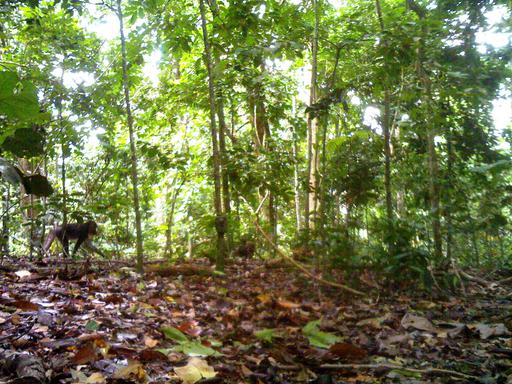

In [31]:
Image(random.choice(mandrillus_as_duiker_blue.img.tolist()))

## Monkey classified as Duiker Blue

In [32]:
monkey_as_duiker_blue = df_preds[(df_preds.label == "Monkey") & (df_preds.pred_1 == "Duiker_Blue")]
print(f"There are {len(monkey_as_duiker_blue)} monkey_as_duiker_blue")
monkey_as_duiker_blue.pred_2.value_counts()

There are 200 monkey_as_duiker_blue


Monkey             64
Duiker_Red         29
Blank              28
Squirrel           28
Chimpanzee         18
Mongoose           12
Human              11
Bird                8
Leopard_African     2
Name: pred_2, dtype: int64

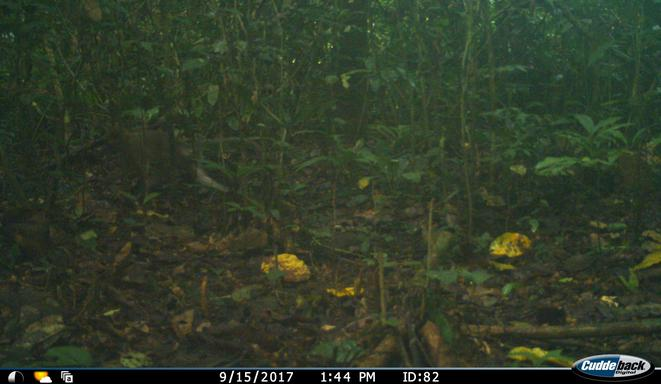

In [33]:
Image(random.choice(monkey_as_duiker_blue.img.tolist()))

# Accuracies per species

In [34]:
for animal in classes:
    df_animal = df_preds[df_preds.label == animal]
    count = len(df_animal)
    acc = round(100 * len(df_animal[df_animal.pred_1 == animal]) / count,2)
    top2_acc = round(100 * len(df_animal[(df_animal.pred_1 == animal) | (df_animal.pred_2 == animal)]) / count,2)
    top3_acc = round(100 * len(df_animal[(df_animal.pred_1 == animal) | (df_animal.pred_2 == animal) | (df_animal.pred_3 == animal)]) / count,2)
    print(f" {animal:22} has acc: {acc:<5}%, top2_acc: {top2_acc:<5}%, top3_acc: {top3_acc:<5}%, count in valid: {count}") 

 Bird                   has acc: 74.31%, top2_acc: 84.56%, top3_acc: 89.9 %, count in valid: 693
 Blank                  has acc: 86.0 %, top2_acc: 91.12%, top3_acc: 93.6 %, count in valid: 5000
 Buffalo_African        has acc: 60.66%, top2_acc: 82.19%, top3_acc: 89.65%, count in valid: 483
 Cat_Golden             has acc: 22.67%, top2_acc: 40.0 %, top3_acc: 48.0 %, count in valid: 75
 Chevrotain_Water       has acc: 34.85%, top2_acc: 46.72%, top3_acc: 57.07%, count in valid: 396
 Chimpanzee             has acc: 58.38%, top2_acc: 73.0 %, top3_acc: 78.4 %, count in valid: 1074
 Civet_African_Palm     has acc: 40.98%, top2_acc: 57.38%, top3_acc: 63.93%, count in valid: 61
 Duiker_Blue            has acc: 82.6 %, top2_acc: 93.06%, top3_acc: 96.48%, count in valid: 5000
 Duiker_Red             has acc: 88.28%, top2_acc: 93.3 %, top3_acc: 95.26%, count in valid: 5000
 Duiker_Yellow_Backed   has acc: 71.56%, top2_acc: 79.45%, top3_acc: 84.04%, count in valid: 1090
 Elephant_African       has

# Accuracies per source

In [43]:
meta_df_full = pd.read_csv(HOME_FOLDER_OF_REPO / "inspect_data_split_validation/train_valid_df.csv")
meta_df = meta_df_full[meta_df_full.is_valid == True]
meta_df.head()

,uniqueName,species,main_folder,is_valid,sub_folder
24,0000103.jpg,Blank,Compressed Camera Trap Images,True,T11
25,0000104.jpg,Human,Compressed Camera Trap Images,True,T11
26,0000105.jpg,Human,Compressed Camera Trap Images,True,T11
27,0000106.jpg,Human,Compressed Camera Trap Images,True,T11
28,0000108.jpg,Blank,Compressed Camera Trap Images,True,T28


#### join main_folder and sub_folder from meta_df based on uniqueName

In [48]:
df_preds = pd.merge(df_preds, meta_df[["uniqueName", "main_folder", "sub_folder"]], how="inner", on="uniqueName")

In [49]:
print(df_preds.shape)
df_preds.head()

(43628, 39)


,Bird,Blank,Buffalo_African,Cat_Golden,Chevrotain_Water,Chimpanzee,Civet_African_Palm,Duiker_Blue,Duiker_Red,Duiker_Yellow_Backed,...,img,uniqueName,pred_1,pred_2,pred_3,score_1,score_2,score_3,main_folder,sub_folder
0,4.655969e-08,8.717845e-08,1.714084e-07,2.941357e-10,6.642564e-09,4.328345e-10,4.135269e-09,5.556704e-08,1.924823e-08,4.718254e-11,...,/data_rescaled/resc_1039759.jpg,1039759.jpg,Human,Hog_Red_River,Buffalo_African,0.997131,0.002868,1.714084e-07,Compressed Camera Trap Images,T18
1,5.661279e-06,8.510786e-04,7.002197e-06,1.580305e-07,2.478688e-03,1.838122e-06,8.551294e-06,7.195574e-05,2.097772e-06,1.497921e-06,...,/data_rescaled/resc_1195784.jpg,1195784.jpg,Porcupine_Brush_Tailed,Hog_Red_River,Rat_Giant,0.982969,0.008077,4.515152e-03,allData,StephBrittainZSL
2,5.095516e-08,9.990834e-01,1.129752e-06,1.137677e-08,1.609592e-08,2.568008e-08,4.873502e-08,1.953605e-07,1.630463e-07,7.535878e-10,...,/data_rescaled/resc_0880576.jpg,0880576.jpg,Blank,Human,Elephant_African,0.999083,0.000526,3.863540e-04,Compressed Camera Trap Images,T11
3,1.370626e-03,7.104965e-01,6.293981e-03,5.814397e-05,8.215211e-04,2.061178e-04,1.176124e-04,1.942325e-03,3.472823e-04,1.045766e-05,...,/data_rescaled/resc_1194852.jpg,1194852.jpg,Blank,Elephant_African,Buffalo_African,0.710497,0.260123,6.293981e-03,allData,StephBrittainZSL
4,5.872330e-02,3.254626e-04,6.685724e-04,3.376703e-04,1.701453e-03,2.628898e-04,3.934061e-04,2.760512e-01,4.157926e-01,5.745498e-05,...,/data_rescaled/resc_1201480.jpg,1201480.jpg,Duiker_Red,Duiker_Blue,Hog_Red_River,0.415793,0.276051,2.175805e-01,allData,LailaBahaaelDinPanthera


In [58]:
sources = df_preds.main_folder.unique()
for source in sources:
    df_source = df_preds[df_preds.main_folder == source]
    count = len(df_source)
    acc = round(100 * len(df_source[df_source.pred_1 == df_source.label]) / count,2)
    top2_acc = round(100 * len(df_source[(df_source.pred_1 == df_source.label) | (df_source.pred_2 == df_source.label)]) / count,2)
    print(f"{source:30} has acc: {acc:<5}%, top2_acc: {top2_acc:<4}%, count in valid: {count:>6}") 

Compressed Camera Trap Images  has acc: 94.18%, top2_acc: 97.88%, count in valid:  13428
allData                        has acc: 68.18%, top2_acc: 82.23%, count in valid:  24328
Camera trap Nki National Park  has acc: 74.83%, top2_acc: 85.58%, count in valid:   5872


In [59]:
sources = meta_df.main_folder.unique()
for source in sources:
    df_source = df_preds[df_preds.main_folder == source]
    sub_sources = df_source.sub_folder.unique()
    print(f"\n{source}")
    for sub_source in sub_sources:
        df_sub_source = df_source[df_source.sub_folder == sub_source]
        count = len(df_sub_source)
        acc = round(100 * len(df_sub_source[df_sub_source.pred_1 == df_sub_source.label]) / count,2)
        top2_acc = round(100 * len(df_sub_source[(df_sub_source.pred_1 == df_sub_source.label) | (df_sub_source.pred_2 == df_sub_source.label)]) / count,2)
        print(f"  {sub_source:30} has acc: {acc:<5}%, top2_acc: {top2_acc:<4}%, count in valid: {count:>6}") 


Compressed Camera Trap Images
  T18                            has acc: 92.4 %, top2_acc: 97.35%, count in valid:   1473
  T11                            has acc: 95.98%, top2_acc: 99.25%, count in valid:   2540
  T1                             has acc: 92.56%, top2_acc: 96.73%, count in valid:   5743
  T28                            has acc: 95.69%, top2_acc: 98.81%, count in valid:   3036
  T41                            has acc: 98.58%, top2_acc: 99.53%, count in valid:    636

Camera trap Nki National Park
  C06                            has acc: 68.2 %, top2_acc: 80.77%, count in valid:   2387
  C16                            has acc: 81.72%, top2_acc: 90.75%, count in valid:   1395
  C01                            has acc: 81.18%, top2_acc: 91.28%, count in valid:   1514
  C12                            has acc: 68.92%, top2_acc: 77.95%, count in valid:    576

allData
  StephBrittainZSL               has acc: 69.45%, top2_acc: 80.15%, count in valid:   7770
  LailaBahaaelDinPa